In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.shape

(284807, 31)

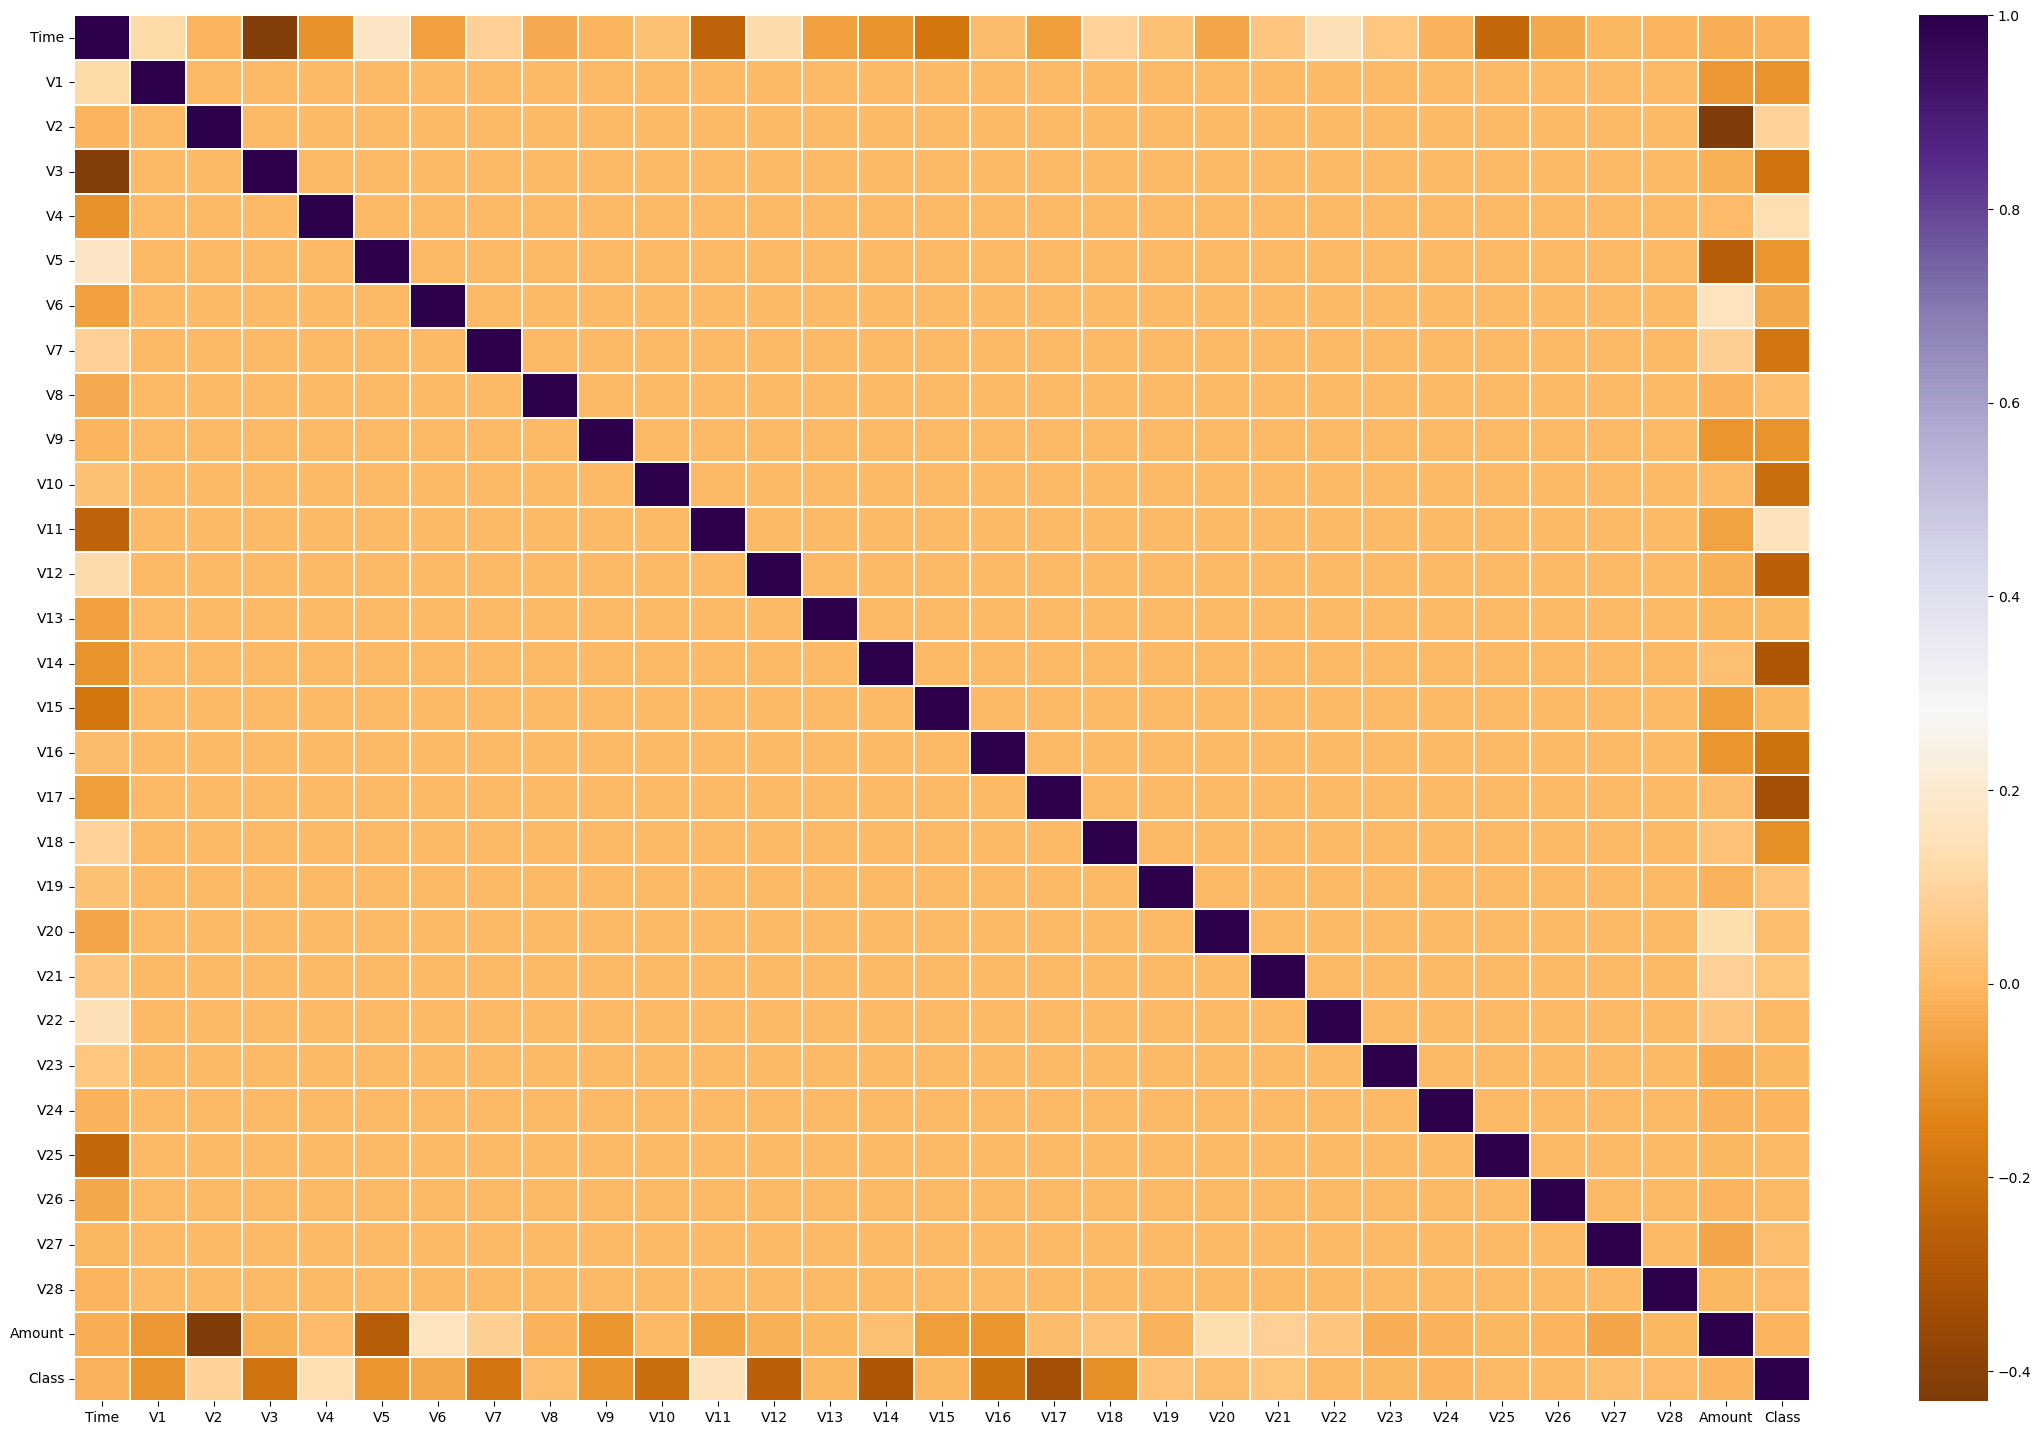

In [71]:
plt.figure(figsize = (28,18))
sns.heatmap(df.corr(),cmap = 'PuOr',linewidth = 0.01)
plt.show()

In [10]:
df.corr()['Class'].sort_values(ascending = False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
genuine = df['Class'].value_counts()[0]/df['Class'].count()*100
fraud = df['Class'].value_counts()[1]/df['Class'].count()*100
print(genuine)
print(fraud)

99.82725143693798
0.1727485630620034


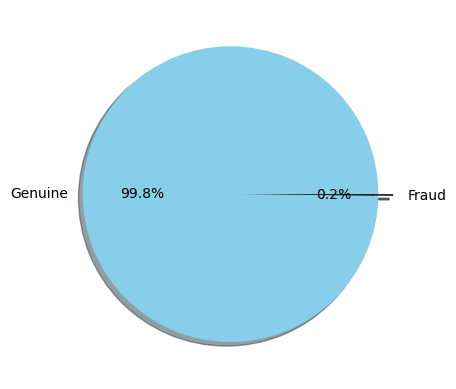

In [13]:
plt.pie(df['Class'].value_counts(),labels = ['Genuine','Fraud'],explode = [0.1,0],shadow = True,autopct = '%0.1f%%',colors = ['skyblue','black'])
plt.show()

In [14]:
df[df['Class'] == 0].describe()['Amount']

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
df[df['Class'] == 1].describe()['Amount']

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
from scipy.stats import skew
skew(df['Amount'])

16.97763503663315

In [17]:
df['Amount'] = np.log(df['Amount'])

In [18]:
non_inf_values = df['Amount'][df['Amount'] != -np.inf]
mean_value = non_inf_values.mean()
df['Amount'][df['Amount'] == -np.inf] = mean_value

In [19]:
np.isinf(df['Amount']).sum()

0

In [20]:
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df[['Amount']])
df['Time'] = ss.fit_transform(df[['Time']])

In [21]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [22]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(sampling_strategy = 'not minority' ,random_state = 1)

In [23]:
X,y = rs.fit_resample(X,y)

In [24]:
y.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size = 0.2,random_state = 1,stratify = y) 

##### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 4)
lr.fit(Xtrain,ytrain)

LogisticRegression(C=4)

In [27]:
ypred_lr = lr.predict(Xtest)

In [28]:
lr_pr = precision_score(ytest,ypred_lr)
lr_recall = recall_score(ytest,ypred_lr)
lr_f1 = f1_score(ytest,ypred_lr)
lr_acc = accuracy_score(ytest,ypred_lr)
lr_cv = np.mean(cross_val_score(lr,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_lr))

[[98  0]
 [11 88]]


##### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 20,min_samples_leaf = 40)
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=40)

In [30]:
ypred_dt = dt.predict(Xtest)

In [31]:
dt_pr = precision_score(ytest,ypred_dt)
dt_recall = recall_score(ytest,ypred_dt)
dt_f1 = f1_score(ytest,ypred_dt)
dt_acc = accuracy_score(ytest,ypred_dt)
dt_cv = np.mean(cross_val_score(dt,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_dt))

[[97  1]
 [ 9 90]]


##### AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(learning_rate = 0.9,n_estimators = 120,random_state = 1)
ab.fit(Xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.9, n_estimators=120, random_state=1)

In [33]:
ypred_ab = ab.predict(Xtest)

In [34]:
ab_pr = precision_score(ytest,ypred_ab)
ab_recall = recall_score(ytest,ypred_ab)
ab_f1 = f1_score(ytest,ypred_ab)
ab_acc = accuracy_score(ytest,ypred_ab)
ab_cv = np.mean(cross_val_score(ab,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_ab))

[[95  3]
 [10 89]]


##### GradientBoost

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate = 0.9, random_state = 1, n_estimators = 100)
gb.fit(Xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.9, random_state=1)

In [36]:
ypred_gb = gb.predict(Xtest)

In [37]:
gb_pr = precision_score(ytest,ypred_gb)
gb_recall = recall_score(ytest,ypred_gb)
gb_f1 = f1_score(ytest,ypred_gb)
gb_acc = accuracy_score(ytest,ypred_gb)
gb_cv = np.mean(cross_val_score(gb,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_gb))

[[97  1]
 [14 85]]


##### XGB

In [38]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate = 0.9, random_state = 1, n_estimators = 70)
xg.fit(Xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [39]:
ypred_xg = xg.predict(Xtest)

In [40]:
xg_pr = precision_score(ytest,ypred_xg)
xg_recall = recall_score(ytest,ypred_xg)
xg_f1 = f1_score(ytest,ypred_xg)
xg_acc = accuracy_score(ytest,ypred_xg)
xg_cv = np.mean(cross_val_score(xg,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_xg))

[[98  0]
 [12 87]]


##### LinearSVC

In [41]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state = 1,C = 2.5)
lsvc.fit(Xtrain,ytrain)

LinearSVC(C=2.5, random_state=1)

In [42]:
ypred_lsvc = lsvc.predict(Xtest)

In [43]:
lsvc_pr = precision_score(ytest,ypred_lsvc)
lsvc_recall = recall_score(ytest,ypred_lsvc)
lsvc_f1 = f1_score(ytest,ypred_lsvc)
lsvc_acc = accuracy_score(ytest,ypred_lsvc)
lsvc_cv = np.mean(cross_val_score(lsvc,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_lsvc))

[[98  0]
 [11 88]]


##### SVC poly

In [44]:
from sklearn.svm import SVC
svc_poly = SVC(kernel = 'poly',degree = 2,random_state = 1, C= 1)
svc_poly.fit(Xtrain, ytrain)

SVC(C=1, degree=2, kernel='poly', random_state=1)

In [45]:
ypred_svc_poly = svc_poly.predict(Xtest)

In [46]:
svc_poly_pr = precision_score(ytest,ypred_svc_poly)
svc_poly_recall = recall_score(ytest,ypred_svc_poly)
svc_poly_f1 = f1_score(ytest,ypred_svc_poly)
svc_poly_acc = accuracy_score(ytest,ypred_svc_poly)
svc_poly_cv = np.mean(cross_val_score(svc_poly,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_svc_poly))

[[98  0]
 [19 80]]


##### SVC rbf

In [47]:
svc_rbf = SVC(kernel = 'rbf',degree = 2,random_state = 1, C = 0.7)
svc_rbf.fit(Xtrain, ytrain)

SVC(C=0.7, degree=2, random_state=1)

In [48]:
ypred_svc_rbf = svc_rbf.predict(Xtest)

In [49]:
svc_rbf_pr = precision_score(ytest,ypred_svc_rbf)
svc_rbf_recall = recall_score(ytest,ypred_svc_rbf)
svc_rbf_f1 = f1_score(ytest,ypred_svc_rbf)
svc_rbf_acc = accuracy_score(ytest,ypred_svc_rbf)
svc_rbf_cv = np.mean(cross_val_score(svc_rbf,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_svc_rbf))

[[98  0]
 [14 85]]


##### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain,ytrain)

GaussianNB()

In [51]:
ypred_nb = nb.predict(Xtest)

In [52]:
nb_pr = precision_score(ytest,ypred_nb)
nb_recall = recall_score(ytest,ypred_nb)
nb_f1 = f1_score(ytest,ypred_nb)
nb_acc = accuracy_score(ytest,ypred_nb)
nb_cv = np.mean(cross_val_score(nb,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_nb))

[[98  0]
 [13 86]]


##### K Nearest

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=6)

In [54]:
ypred_knn = knn.predict(Xtest)

In [55]:
knn_pr = precision_score(ytest,ypred_knn)
knn_recall = recall_score(ytest,ypred_knn)
knn_f1 = f1_score(ytest,ypred_knn)
knn_acc = accuracy_score(ytest,ypred_knn)
knn_cv = np.mean(cross_val_score(knn,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_knn))

[[98  0]
 [15 84]]


##### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf = 8,n_estimators = 90,max_depth = 18)
rf.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=18, min_samples_leaf=8, n_estimators=90)

In [57]:
ypred_rf = rf.predict(Xtest)

In [58]:
rf_pr = precision_score(ytest,ypred_rf)
rf_recall = recall_score(ytest,ypred_rf)
rf_f1 = f1_score(ytest,ypred_rf)
rf_acc = accuracy_score(ytest,ypred_rf)
rf_cv = np.mean(cross_val_score(rf,X,y,cv = 6))
print(confusion_matrix(ytest, ypred_rf))

[[98  0]
 [11 88]]


In [59]:
pd.DataFrame({
    'Logistic Regression': [lr_pr, lr_recall, lr_f1, lr_acc, lr_cv],
    'Decision Tree': [dt_pr, dt_recall, dt_f1, dt_acc, dt_cv],
    'AdaBoost': [ab_pr, ab_recall, ab_f1, ab_acc, ab_cv],
    'Gradient Boost': [gb_pr, gb_recall, gb_f1, gb_acc, gb_cv],
    'XGBoost': [xg_pr, xg_recall, xg_f1, xg_acc, xg_cv],
    'LinearSVC': [lsvc_pr, lsvc_recall, lsvc_f1, lsvc_acc, lsvc_cv],
    'SVC poly': [svc_poly_pr, svc_poly_recall, svc_poly_f1, svc_poly_acc, svc_poly_cv],
    'SVC rbf': [svc_rbf_pr, svc_rbf_recall, svc_rbf_f1, svc_rbf_acc, svc_rbf_cv],
    'Naive Bayes': [nb_pr, nb_recall, nb_f1, nb_acc, nb_cv],
    'K Nearest': [knn_pr, knn_recall, knn_f1, knn_acc, knn_cv],
    'Random Forest': [rf_pr, rf_recall, rf_f1, rf_acc, rf_cv]
}, index=['Precision', 'Recall', 'F1 Score', 'Accuracy', 'Mean CVS'])

,Logistic Regression,Decision Tree,AdaBoost,Gradient Boost,XGBoost,LinearSVC,SVC poly,SVC rbf,Naive Bayes,K Nearest,Random Forest
Precision,1.000000,0.989011,0.967391,0.988372,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Recall,0.888889,0.909091,0.898990,0.858586,0.878788,0.888889,0.808081,0.858586,0.868687,0.848485,0.888889
F1 Score,0.941176,0.947368,0.931937,0.918919,0.935484,0.941176,0.893855,0.923913,0.929730,0.918033,0.941176
Accuracy,0.944162,0.949239,0.934010,0.923858,0.939086,0.944162,0.903553,0.928934,0.934010,0.923858,0.944162
Mean CVS,0.935976,0.923780,0.922764,0.932927,0.935976,0.945122,0.908537,0.931911,0.918699,0.932927,0.935976


##### Final Model Selection:
    After training and testing the under-sampled dataset on different algorithms and seeing above table we got to know that 
    Decision Tree provided best results.
So , we have selected Decision Tree model by which we got the following metrics,

##### Model Accuracy: 0.949239

##### Model Precision: 0.989011

##### Model Recall: 0.909091

##### Model F1 Score: 0.947368